### Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns  # for making plots with seaborn

### Data Read

In [2]:
df = pd.read_csv('Datasets/stolen_vehicles.csv')
df.head(10)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102
5,6,Roadbike,636.0,2005.0,YZF-R6T,Black,12/31/21,102
6,7,Trailer,623.0,2021.0,CAAR TRANSPORTER,Silver,11/12/21,114
7,8,Boat Trailer,623.0,2001.0,BOAT,Silver,2/22/22,109
8,9,Trailer,514.0,2021.0,"7X4-6"" 1000KG",Silver,2/25/22,115
9,10,Trailer,514.0,2020.0,8X4 TANDEM,Silver,1/3/22,114


In [53]:
df1 = df[['location_id']].head(5)
df1.loc[len(df1.index)] = {'location_id': 11.111}

In [54]:
df1['location_id'] = df1['location_id'].astype(str)

In [55]:
display(df1.info())
display(df1)

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  6 non-null      object
dtypes: object(1)
memory usage: 96.0+ bytes


None

,location_id
0,102.0
1,105.0
2,102.0
3,106.0
4,102.0
5,11.111


In [3]:
df1 = pd.read_csv('Datasets/make_details.csv')
df1.head()

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [4]:
df2 = pd.read_csv('Datasets/locations.csv')
df2.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [5]:
#Database Description
df3 = pd.read_csv('Datasets/stolen_vehicles_db_data_dictionary.csv')
df3.head(20)

,Table,Field,Description
0,stolen_vehicles,vehicle_id,Unique ID of a stolen vehicle
1,stolen_vehicles,vehicle_type,Type of vehicle
2,stolen_vehicles,make_id,Matches make_id in the make_details table
3,stolen_vehicles,model_year,Model year of vehicle
4,stolen_vehicles,vehicle_desc,Description of vehicle
5,stolen_vehicles,color,Color of vehicle
6,stolen_vehicles,date_stolen,Date the vehicle was stolen (MM/DD/YY)
7,stolen_vehicles,location_id,Matches location_id in the locations table
8,make_details,make_id,Unique ID of the make
9,make_details,make_name,Name of the make


### Data Summary

In [6]:
df.shape

(4553, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_id    4553 non-null   int64  
 1   vehicle_type  4527 non-null   object 
 2   make_id       4538 non-null   float64
 3   model_year    4538 non-null   float64
 4   vehicle_desc  4520 non-null   object 
 5   color         4538 non-null   object 
 6   date_stolen   4553 non-null   object 
 7   location_id   4553 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 284.7+ KB


### Data Cleaning

In [8]:
#count duplicates in the stolen_vehicles.csv file
df.duplicated().sum()

0

In [9]:
#Count Null Values
df.isnull().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
dtype: int64

In [10]:
#Drop Null Values
df.dropna(inplace=True)

In [11]:
#Check if any null values are there now
df.isnull().sum()

vehicle_id      0
vehicle_type    0
make_id         0
model_year      0
vehicle_desc    0
color           0
date_stolen     0
location_id     0
dtype: int64

In [12]:
df.shape

(4509, 8)

## Data Analysis

### Based on Location

In [13]:
#Total Stolen Vehicles by location-id
df.location_id.value_counts().rename_axis('location_id').reset_index(name='Stolen_Vehicles').style.background_gradient(subset=['Stolen_Vehicles'])

,location_id,Stolen_Vehicles
0,102,1620
1,114,657
2,104,442
3,109,417
4,103,365
5,101,233
6,105,173
7,108,138
8,115,135
9,107,112


In [14]:
#Region with the location id 102
df2[df2.location_id == 102].region

1    Auckland
Name: region, dtype: object

Most vehicles that has been stolen is fom Auckland with the population of 1.7 Million

In [15]:
pf = df.location_id.value_counts().reset_index(name='stolen_vehicles').sort_values(['location_id'], ascending=True)
pf.head()

,location_id,stolen_vehicles
5,101,233
0,102,1620
4,103,365
2,104,442
6,105,173


In [16]:
# Dataset with 
df4 = pf.merge(df2.drop(['country','density'],axis =1), left_on='location_id', right_on='location_id', how='left').reset_index(drop=True)
df4.head()
df4.sort_values(by='stolen_vehicles', ascending=False)

,location_id,stolen_vehicles,region,population
1,102,1620,Auckland,"1,695,200"
10,114,657,Canterbury,"655,000"
3,104,442,Bay of Plenty,"347,700"
8,109,417,Wellington,"543,500"
2,103,365,Waikato,"513,800"
0,101,233,Northland,"201,500"
4,105,173,Gisborne,"52,100"
7,108,138,Manawatū-Whanganui,"258,200"
11,115,135,Otago,"246,000"
6,107,112,Taranaki,"127,300"


In [17]:
#changing the data type of population column
df4['population'] = df4['population'].str.replace('[,]', '', regex=True)
df4['population'] = df4['population'].astype(int) 

Assuming that around 20% of the population have cars 

In [18]:
#Ratio of stolen vehicles to population
df4['total_cars'] = (df4['population'] * 0.02).round().astype(int)
df4.head()

,location_id,stolen_vehicles,region,population,total_cars
0,101,233,Northland,201500,4030
1,102,1620,Auckland,1695200,33904
2,103,365,Waikato,513800,10276
3,104,442,Bay of Plenty,347700,6954
4,105,173,Gisborne,52100,1042


In [19]:
#Percent of total cars stolen
df4['percent_stolen'] = (df4['stolen_vehicles'] / df4['total_cars'] * 100).round(2)
df4.sort_values(by='percent_stolen', ascending=False)

,location_id,stolen_vehicles,region,population,total_cars,percent_stolen
4,105,173,Gisborne,52100,1042,16.60
9,111,91,Nelson,54500,1090,8.35
3,104,442,Bay of Plenty,347700,6954,6.36
0,101,233,Northland,201500,4030,5.78
10,114,657,Canterbury,655000,13100,5.02
1,102,1620,Auckland,1695200,33904,4.78
6,107,112,Taranaki,127300,2546,4.40
8,109,417,Wellington,543500,10870,3.84
2,103,365,Waikato,513800,10276,3.55
5,106,100,Hawke's Bay,182700,3654,2.74


Text(0.5, 1.0, 'Total Stolen Vehicles by Region')

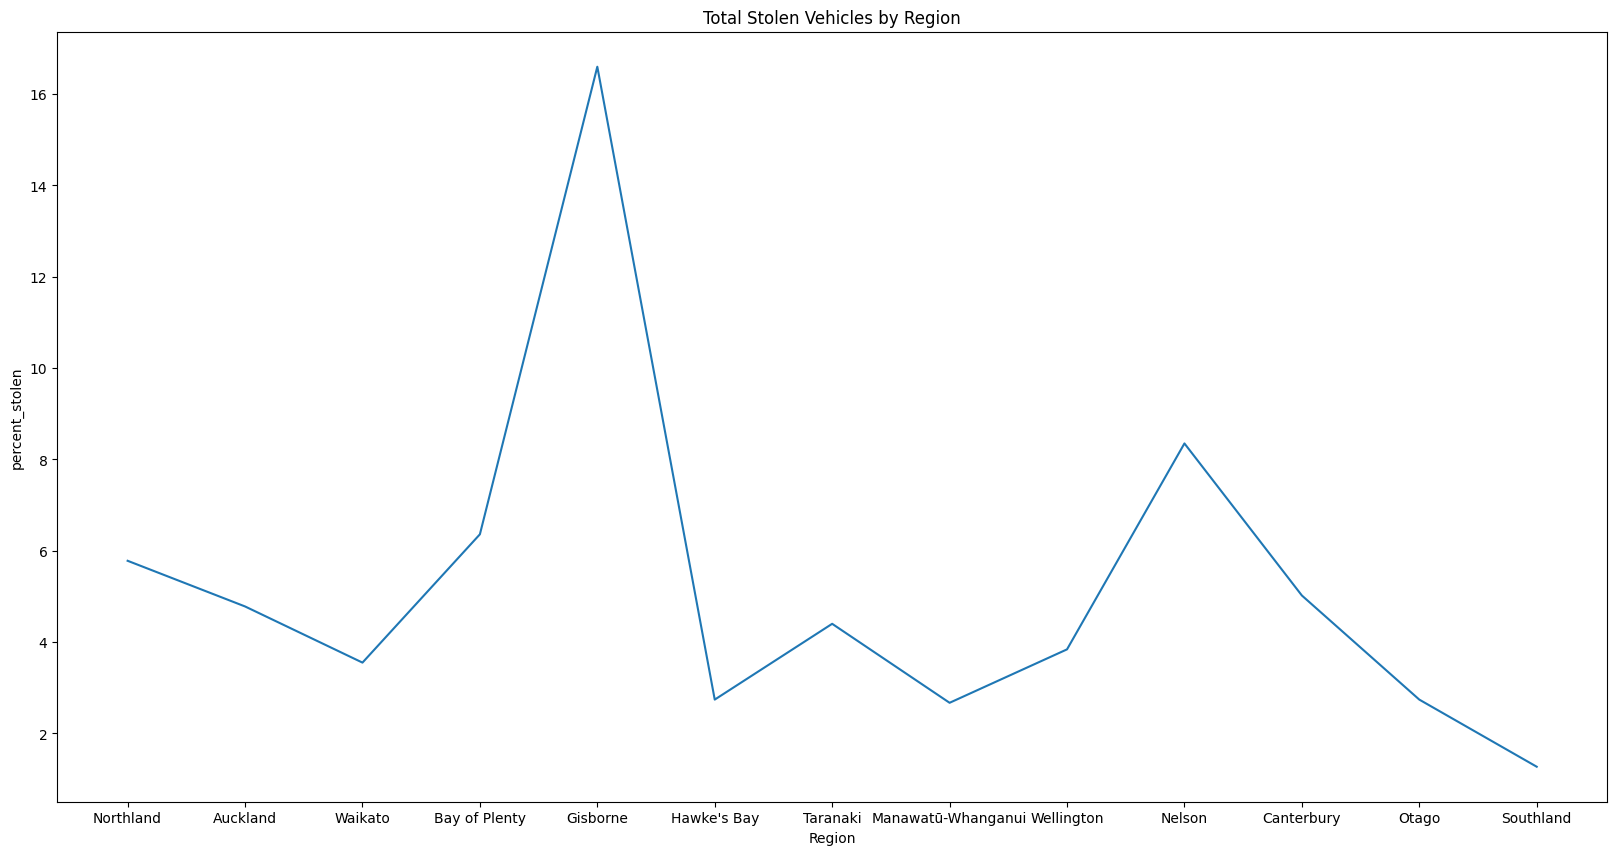

In [20]:
#line chart for total stolen vehicles by location-id
plt.figure(figsize=(20,10))
plt.plot(df4['region'],df4['percent_stolen'])
plt.xlabel('Region')
plt.ylabel('percent_stolen')
plt.title('Total Stolen Vehicles by Region')

Based on the Data, Most percentage of stolen cars are in Gisborne Region

### Based on Type of Vehicle


In [21]:
# Types of vehicles stolen in total  
sf = df['vehicle_type'].value_counts().rename_axis('vehicle_type').reset_index(name='stolen_vehicle_type')
sf.style.background_gradient(subset=['stolen_vehicle_type'])


,vehicle_type,stolen_vehicle_type
0,Stationwagon,944
1,Saloon,850
2,Hatchback,644
3,Trailer,572
4,Utility,466
5,Roadbike,297
6,Moped,187
7,Light Van,154
8,Boat Trailer,104
9,Trailer - Heavy,89


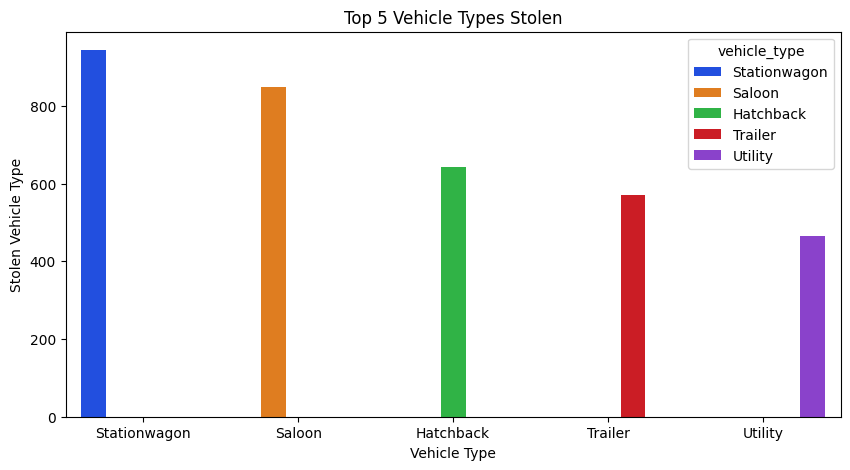

In [22]:
# Top 5 vehicle types stolen
plt.figure(figsize=(10,5))

sf_5 = sf.head(5)
sns.barplot(x='vehicle_type', y='stolen_vehicle_type', data=sf_5, hue='vehicle_type', palette='bright')
plt.xlabel('Vehicle Type')
plt.ylabel('Stolen Vehicle Type')
plt.title('Top 5 Vehicle Types Stolen')
plt.show()

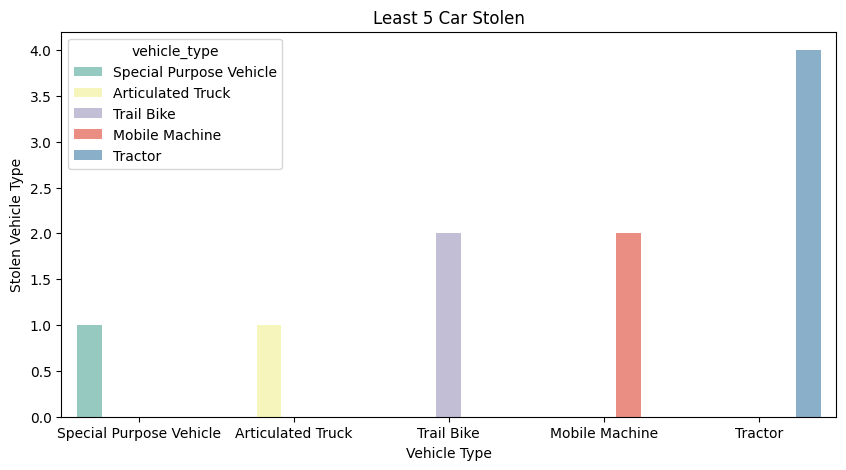

In [23]:
# Least 5 Car Stolen
plt.figure(figsize=(10,5))

sf_l5 = sf.tail(5).sort_values(by='stolen_vehicle_type', ascending=True) 
sns.barplot(x='vehicle_type', y='stolen_vehicle_type', data=sf_l5, hue='vehicle_type', palette='Set3')
plt.xlabel('Vehicle Type')
plt.ylabel('Stolen Vehicle Type')
plt.title('Least 5 Car Stolen')
plt.show()


### Based on Days

In [24]:
# Cleaning data for better use of data and analysis
df5 = df[['vehicle_type','make_id','model_year','color','date_stolen','location_id']]
df5.head()

,vehicle_type,make_id,model_year,color,date_stolen,location_id
0,Trailer,623.0,2021.0,Silver,11/5/21,102
1,Boat Trailer,623.0,2021.0,Silver,12/13/21,105
2,Boat Trailer,623.0,2021.0,Silver,2/13/22,102
3,Trailer,623.0,2021.0,Silver,11/13/21,106
4,Trailer,623.0,2018.0,Silver,1/10/22,102


In [25]:
df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_1988\3495704390.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_1988\3495704390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])


In [26]:
df5.dtypes

vehicle_type            object
make_id                float64
model_year             float64
color                   object
date_stolen     datetime64[ns]
location_id              int64
dtype: object

In [27]:
df5['week'] = df5.date_stolen.dt.isocalendar().week
df5['weekday'] = df5.date_stolen.dt.day_name()
df5['month'] = df5.date_stolen.dt.month_name()

C:\Users\harsh\AppData\Local\Temp\ipykernel_1988\928568546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['week'] = df5.date_stolen.dt.isocalendar().week


In [28]:
df5.head()

,vehicle_type,make_id,model_year,color,date_stolen,location_id,week,weekday,month
0,Trailer,623.0,2021.0,Silver,2021-11-05,102,44,Friday,November
1,Boat Trailer,623.0,2021.0,Silver,2021-12-13,105,50,Monday,December
2,Boat Trailer,623.0,2021.0,Silver,2022-02-13,102,6,Sunday,February
3,Trailer,623.0,2021.0,Silver,2021-11-13,106,45,Saturday,November
4,Trailer,623.0,2018.0,Silver,2022-01-10,102,2,Monday,January


In [29]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

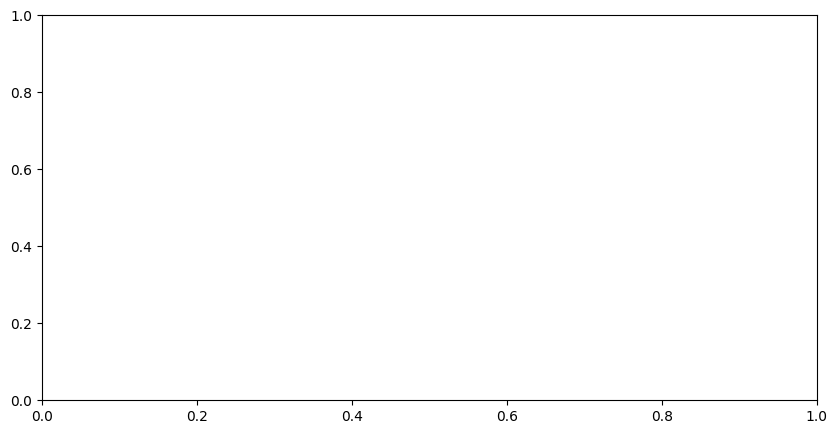

In [30]:
#Cars stolen by month
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df5, order=month_order, hue='month',palette='bright',legend=True)
plt.xlabel('Month')
plt.ylabel('Stolen Vehicles')
plt.title('Cars stolen by month')

During May to  September, no stolen cars were recorded in the year 2021-2022. During that time, New Zealand faced COVID-19


Text(0.5, 1.0, 'Cars stolen by weeks')

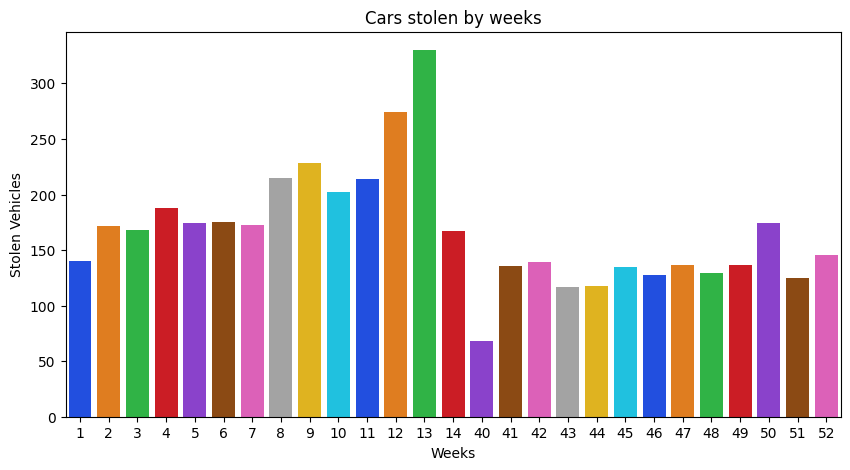

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='week', data=df5, hue='week',palette='bright',legend=False)
plt.xlabel('Weeks')
plt.ylabel('Stolen Vehicles')
plt.title('Cars stolen by weeks')

In [ ]:
#Total Stolen Vehicles by location-id
df5.week.value_counts().rename_axis('week').reset_index(name='Stolen_Vehicles').style.background_gradient(subset=['Stolen_Vehicles'])

,week,Stolen_Vehicles
0,13,330
1,12,274
2,9,228
3,8,215
4,11,214
5,10,202
6,4,188
7,6,175
8,50,174
9,5,174


Week 13 indicates the highest number of vehicle stolen in New Zealand followed by 12th Week. 12th and 13th week comes under the month of March and April

In [ ]:
df5[df5.week == 13].vehicle_type.value_counts()


vehicle_type
Stationwagon       78
Hatchback          73
Saloon             68
Trailer            30
Utility            24
Roadbike           21
Moped              10
Boat Trailer        7
Light Van           5
Sports Car          4
Other Truck         4
Convertible         3
Trailer - Heavy     2
Caravan             1
Name: count, dtype: int64